## Introduction

Thanks to a suggestion given by Professor Brutti, we realized that our dataset could be represented with sets of functions. By using Functional Data Analysis, we can study how the functions given by the heartbeat and the ones given by the evaluation position are varying through different games. We also wanted to apply regression to our functional linear models, in order to understand better the correlation and influence of the two variables with each other.

Goals of our analysis: 
- to study important sources of pattern and variation among the data 
- to explain variation in an outcome or dependent variable by using input or independent variable information
- to compare two or more sets of data with respect to certain types of variation, where two sets of data can contain different sets of replicates of the same functions, or different functions for a common set of replicates.

#### Data representation as a function

The function hb(t) is a function of time, and for each second there is a heartrate value associated, we can plot it just by interpolating the values of time and heartrate.

The function pe(t) (position evaluation) is a funciton of time, we have to smooth it in order to have a good plot, since there isn't a value of position evaluation for each second, but the evaluation changes every time a move is performed. The method that we decided to use for smoothing is B-spline, but we'll talk about it below.

Since our data had different lenghts (the games lasted for a period of time between ten to twenty minutes maximum), we built a function in order to rescale them to fit all in twenty minutes. 

In the following graphs are represented the functions of the heartbeat and evaluation position, first without being scaled and then with the adjusted scaling.


In [14]:
# Importing some useful libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from FDApy.preprocessing.smoothing.local_polynomial import LocalPolynomial
from FDApy.representation.simulation import Brownian
import FDApy
import torch

# Import of our dataset
dataset = pd.read_csv("partite.csv")
dataset = dataset.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])


# Function for heart rate delta calculation
def heart_rate_delta(dataframe, color,game):
    df = dataframe.iloc[:10]
    return np.sum(df[game][color]['HR'])//10

# Showing the dataset
dataset



Game       Game0529-1                                        Game0529-2       \
Player              b                        w                        b        
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed Evaluation   HR   
Time                                                                           
0               -0.57 -2.0      0.0       0.57  4.0      0.0      -0.57 -3.0   
1               -0.57 -1.0      0.0       0.57  3.0      0.0      -0.57 -3.0   
2               -0.57 -2.0      0.0       0.57  2.0      0.0      -0.57 -2.0   
3               -0.45 -1.0      3.0       0.45  1.0      3.0      -0.43 -2.0   
4               -0.45  0.0      3.0       0.45  0.0      3.0      -0.33 -1.0   
...               ...  ...      ...        ...  ...      ...        ...  ...   
1185              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1186              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1187              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1188              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1189              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   

Game                            ... Game0816-6                           \
Player                       w  ...          b          w                 
Statistics TimeUsed Evaluation  ...   TimeUsed Evaluation   HR TimeUsed   
Time                            ...                                       
0               0.0       0.57  ...        0.0       0.55 -2.0      0.0   
1               0.0       0.57  ...        0.0       0.55  0.0      0.0   
2               0.0       0.57  ...        0.0       0.55  0.0      0.0   
3               3.0       0.43  ...        0.0       0.55  1.0      0.0   
4               3.0       0.33  ...        0.0       0.55  1.0      0.0   
...             ...        ...  ...        ...        ...  ...      ...   
1185            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1186            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1187            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1188            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1189            NaN        NaN  ...        NaN        NaN  NaN      NaN   

Game       Game0816-7                                         
Player              b                        w                
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed  
Time                                                          
0               -0.38 -4.0      0.0       0.38 -2.0      0.0  
1               -0.38 -3.0      0.0       0.38 -2.0      0.0  
2               -0.38 -2.0      0.0       0.38 -1.0      0.0  
3               -0.31 -2.0      3.0       0.31 -1.0      3.0  
4               -0.75 -1.0      3.0       0.75  1.0      3.0  
...               ...  ...      ...        ...  ...      ...  
1185             0.03  7.0    592.0      -0.03  6.0    592.0  
1186             0.39  7.0    599.0      -0.39  7.0    599.0  
1187             0.39  7.0    599.0      -0.39  7.0    599.0  
1188             5.75  7.0    599.0      -5.75  7.0    599.0  
1189            -0.22  7.0    599.0       0.22  5.0    599.0  

[1190 rows x 108 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

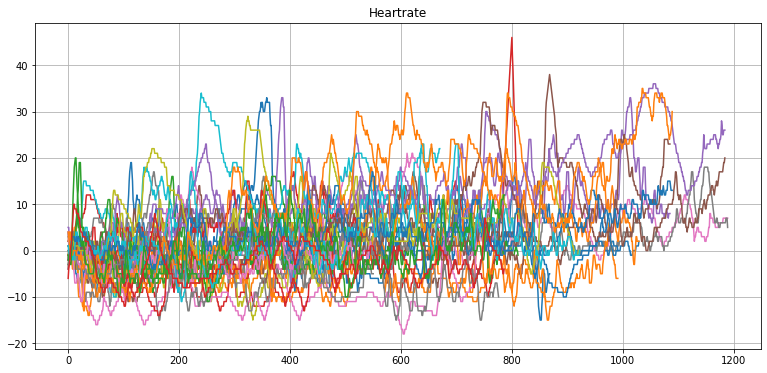

In [13]:
# Here we plotted all the original heartrates' deltas

col= dataset['Game0814-2']['b']['HR']
col = col[~np.isnan(col)]
dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']

for i in range(len(games)):
        dic['x'+str(i)+'b']=np.array(dataset[games[i]]['b']['HR'])
        dic['x'+str(i)+'w']=np.array(dataset[games[i]]['w']['HR'])
        col= dataset[games[i]]['b']['HR']
        col = col[~np.isnan(col)]
        #
heartrate = pd.DataFrame(dic)
time = dataset.index
plt.rcParams["figure.figsize"] = (13,6)
plt.title('Heartrate Delta')
plt.plot(heartrate)
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

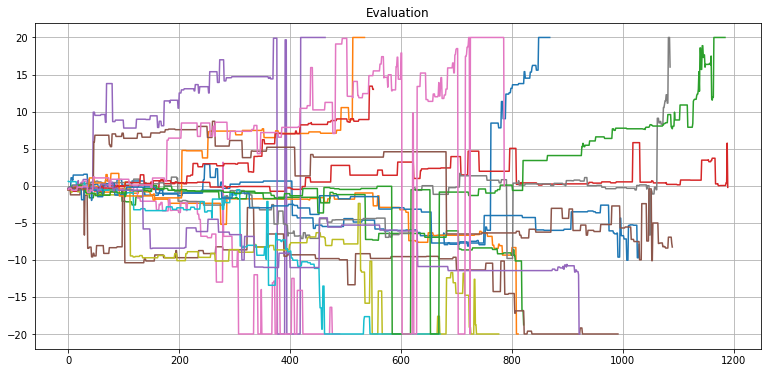

In [15]:
# Position evaluation functions, as we can see this graph is not very easy to read
col= dataset['Game0814-2']['b']['Evaluation']
col = col[~np.isnan(col)]
dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']

for i in range(len(games)):
        dic['x'+str(i)+'b']=np.array(dataset[games[i]]['b']['Evaluation'])

        # We will only print the black evaluations, since the white ones assume the same values but with the opposite sign. 
        #dic['x'+str(i)+'w']=np.array(realwage[games[i]]['w']['Evaluation'])

        col= dataset[games[i]]['b']['HR']
        col = col[~np.isnan(col)]
        
evaluation = pd.DataFrame(dic)
time = dataset.index
plt.title('Evaluation')
plt.plot(evaluation)
plt.grid()
plt.show


Here we add the adjusting function, to have a better overlook at the data.

In [17]:
# Function for adjusting the dataset

def adjust(col, length):
    col = col[~np.isnan(col)]
    col_length = len(col)
    count = 1
    missing = length - col_length
    
    if missing != 0:
        rate = col_length//missing
        if rate >  1:
           
            while col_length < length:
                
                count += rate
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
        if rate == 1 :
            while col_length < length:
                
                count += rate +1 
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
        else:
            
            while col_length < length:
                count += 3
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
                if col_length != length:
                    col=np.insert(col, count, value)
                    col_length=len(col)
    return col

In [71]:
# prove di visualizzazione di adjust
ds = pd.DataFrame()
for i in range(len(games)):
    newcol = adjust(np.array(dataset[games[i]]['b']['Evaluation']), len(dataset))
    ds[i] = newcol
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.55,-0.55,-0.40,-0.38,-0.42,-0.44,-0.57,-0.30,-0.55,0.59,-0.55,-0.55,-0.38,-0.40,-0.38,-0.57,-0.50
1,-0.55,-0.55,-0.40,-0.38,-0.37,-0.44,-0.57,-0.15,-0.52,0.55,-0.52,-0.55,-0.38,-0.40,-0.38,-0.57,-0.50
2,-0.55,-0.55,-0.40,-0.38,-0.37,-0.23,-0.57,-0.15,-0.52,0.55,-0.52,-0.55,-0.24,-0.40,-0.24,-0.57,-0.37
3,-0.55,-0.55,-0.40,-0.31,-0.37,-0.23,-0.43,-0.15,-0.52,0.55,-0.52,-0.55,-0.24,-0.40,-0.24,-0.45,-0.37
4,-0.55,-0.55,-0.45,-0.75,-0.37,-1.23,-0.43,-0.24,-0.52,0.55,-0.52,-0.55,-0.24,-0.40,-0.24,-0.45,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,20.00,-8.34,-10.15,0.03,20.00,-20.00,-20.00,11.14,-20.00,-20.00,-5.33,20.00,20.00,13.43,-11.59,-6.94,20.00
1186,20.00,-20.00,-16.83,0.39,20.00,-20.00,-20.00,20.00,-20.00,-20.00,-9.72,20.00,20.00,13.43,-11.59,-6.94,20.00
1187,20.00,-20.00,-16.83,0.39,20.00,-20.00,-20.00,20.00,-20.00,-20.00,-9.72,20.00,20.00,13.43,-12.00,-6.94,20.00
1188,20.00,-20.00,-16.83,5.75,20.00,-20.00,-20.00,20.00,-20.00,-20.00,-9.72,20.00,20.00,13.00,-20.00,-7.77,20.00


<function matplotlib.pyplot.show(close=None, block=None)>

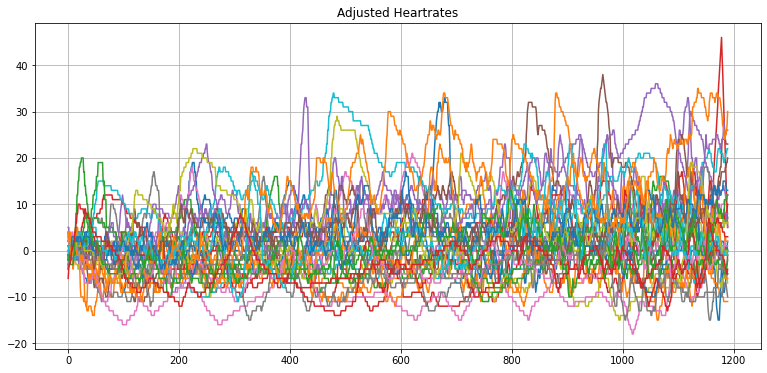

In [21]:
# Showing the adjusted heartrates (still using the delta)
dataset.dropna(axis=1)

dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
for i in range(len(games)):
        dic['x'+str(i)+'b']=adjust(np.array(dataset[games[i]]['b']['HR']), len(dataset))
        dic['x'+str(i)+'w']=adjust(np.array(dataset[games[i]]['w']['HR']),len(dataset))
heartrate_adj = pd.DataFrame(dic)
time = dataset.index
plt.plot(heartrate_adj)
plt.title('Adjusted Heartrates')
plt.grid()
plt.show()


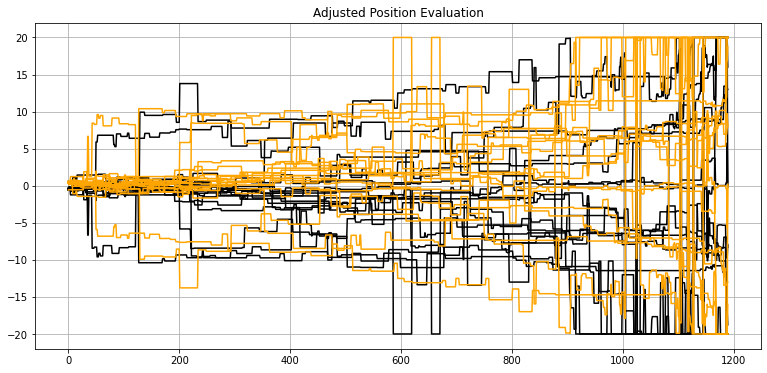

In [320]:
# Printing out the adjusted evaluations. In this graph we show the symmetric evaluations between black and white players.
dataset.dropna(axis=1)

dicw = {}
dicb = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
for i in range(len(games)):
        dicb['x'+str(i)+'b']=adjust(np.array(dataset[games[i]]['b']['Evaluation']), len(dataset))
        dicw['x'+str(i)+'w']=adjust(np.array(dataset[games[i]]['w']['Evaluation']),len(dataset))
evaluationw = pd.DataFrame(dicw)
evaluationb = pd.DataFrame(dicb)
time = dataset.index
plt.plot(evaluationb, color='black')
plt.plot(evaluationw, color='orange')
plt.title('Adjusted Position Evaluation')
plt.grid()
plt.show()


102


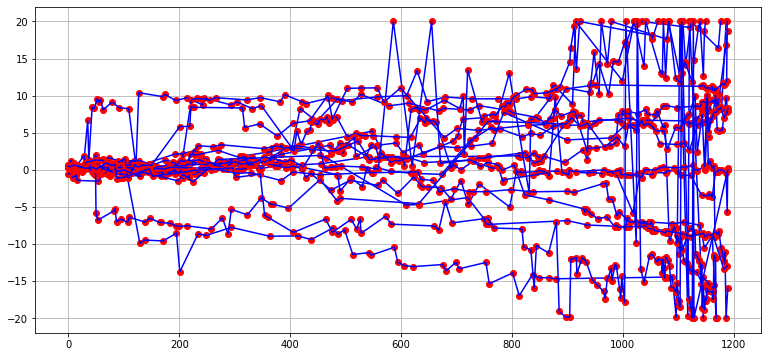

In [236]:
# prove di visualizzazione di adjust
ds = pd.DataFrame()
for i in range(len(games)):
    newcol = adjust(np.array(dataset[games[i]]['w']['Evaluation']), len(dataset))
    ds[i] = newcol


for y in range(len(ds.columns)):
    eval = [ds[y][0]]
    te = [0]
    c  = 0
    for x in range(1, len(ds[y])):
        
        if ds[y][x] != ds[y][x-1]:
            c +=1
            eval.append(ds[y][x])
            te.append(x)
    plt.plot(te, eval, 'ro', label="evaluation p.")
    plt.plot(te, eval, 'b', label="linear interpolation")


plt.grid()
print(c)
#ds.to_csv(path_or_buf='vediamo.csv')

We will keep using the adjusted data in order to simplyfy all the following operations. Another transformation that we can apply to our data for manipulating it in an easier way is smoothing.

#### Using a basis

In functional data analysis is common to use linear combinations of basis functions for representing data functions. 
A basis function system is a set of known, independent from each other, functions $ \phi_k$. The reason why basis funtion systems are used so much is that it's possible to approximate any function by taking a linear combination of basis functions. We can represent a function x(t) using K basis $ \phi_k$ with the following linear expansion:
$$ x(t) = \sum^K_{k=1} c_k \phi_k(t) $$

The most common used basis are the Fourier and the B-Spline basis. For our dataset we decided to use the B-splice basis since our dataset doesn't represent periodic data, and a basis function should have the same features as the functions that it estimates.

The first thing that we do when using a spline basis is to divide the interval in which the funcion ranges, into L subintervals, those subintervals are called knots. Over each interval the spline will be a polynomial of order m. We decided to use 5 basis to approximate our evaluation function and we used the scikit-lear library for repressent it graphically


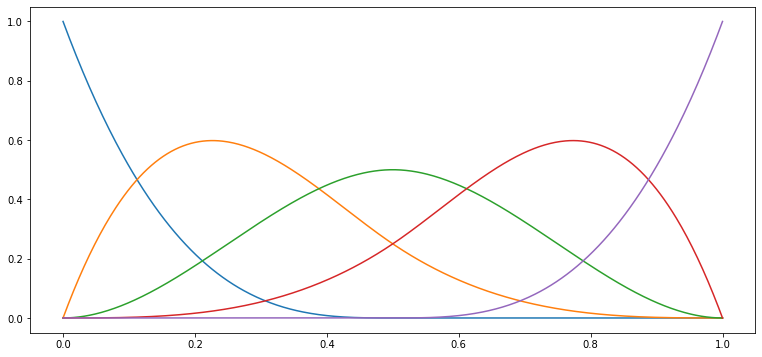

In [226]:
#BSpline basis 5
import skfda
basis = skfda.representation.basis.BSpline(n_basis=5)
basis.plot()
plt.show()

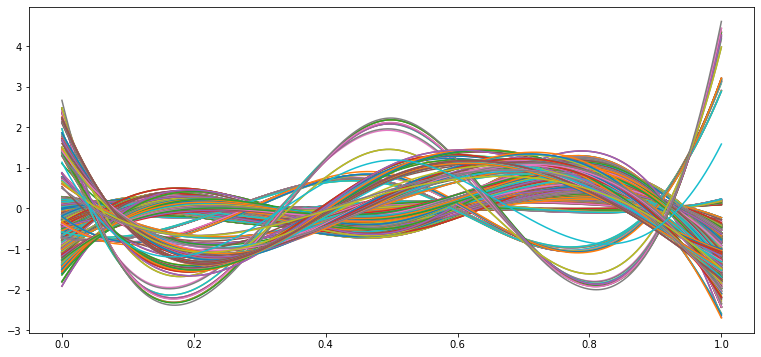

In [227]:
# B-spline with 9 basis functions

eva = pd.read_csv('evaluation.csv')
# time = (heartrate.index).to_numpy()
eva = eva.to_numpy()
eva = skfda.FDataGrid(data_matrix=eva)

X_basis = eva.to_basis(basis)
X_basis.plot()
plt.grid
plt.show()


<class 'skfda.representation.grid.FDataGrid'>
1 1


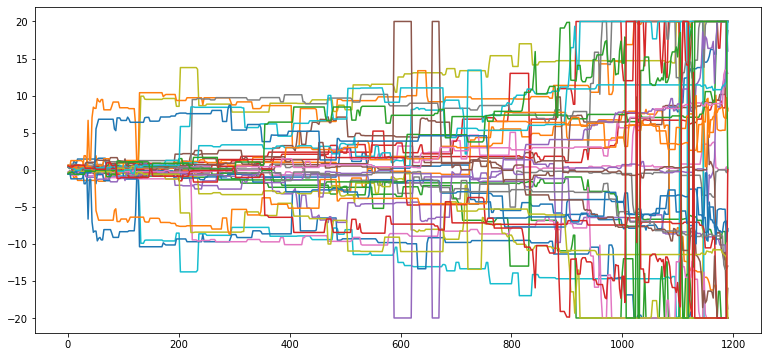

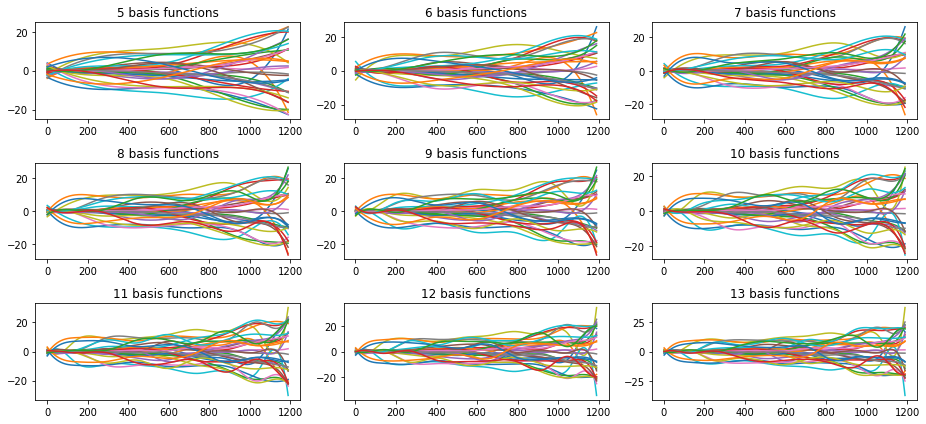

In [340]:
max_basis = 13

heartrate = pd.read_csv('evaluation.csv')
listona = []
for column in heartrate:
    lista = list(heartrate[column])
    listona.append(lista)


# time = (heartrate.index).to_numpy()
#heartrate = heartrate.to_numpy()
heartrate = skfda.FDataGrid(data_matrix=listona, sample_points=[*range(1, len(listona[0])+1)])
#print(type(heartrate))
#print(listona)
# Select only the first 5 samples
print(heartrate.dim_domain, heartrate.dim_codomain)
X = heartrate

X.plot()

fig, axes = plt.subplots(nrows=3, ncols=3)

for n_basis in range(5, max_basis + 1):
    basis = skfda.representation.basis.BSpline(n_basis=n_basis)
    X_basis = X.to_basis(basis)

    ax = axes.ravel()[n_basis - 5]
    fig = X_basis.plot(axes=ax)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()

### Functional linear model

We will now try to find a linear model concerning how losing or winning a game influences the heart-rate, considering the heart-beat as our functional dependent variable. In order to do so we will first start by dividing the players' data in winners and loosers, then we will use some simple statistical methods that we will use to find the liner model afterwords.

Let's start now with the basics: the mean and standard deviation of functional data are the same for traditional data.

Mean: $ \bar{x}(t) = \frac{1}{N} \sum_{i=1}^{N} x_i(t) $

Standadar deviation: $ \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} [x_i(t)-\bar{x}(t)]^2} $

Then we will also find the grand mean, that is the average of all the means of our heartrate functions.

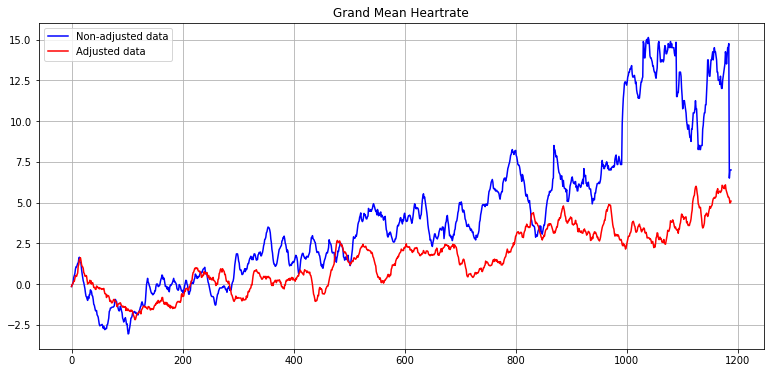

In [247]:
#Grand Mean plot

dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
for i in range(len(games)):
        dic['x'+str(i)+'b']=np.array(dataset[games[i]]['b']['HR'])
        dic['x'+str(i)+'w']=np.array(dataset[games[i]]['w']['HR'])
        
heartrate = pd.DataFrame(dic)
time = dataset.index

tim = ds.index
mean_x=[i for i in range(max(tim))]
mean_y = [(heartrate_adj.loc[i]).mean() for i in mean_x]

mean_x_axis = [i for i in range(max(time))]
mean_y_axis = [(heartrate.loc[i]).mean() for i in mean_x_axis]
plt.grid()
plt.plot(mean_x_axis, mean_y_axis, 'b')
plt.plot(mean_x, mean_y, 'r')
plt.title('Grand Mean Heartrate')
plt.legend(['Non-adjusted data', 'Adjusted data'])

From this single plot we can observe that the mean given by the data that was left untouched reached higher heart rate increase levels, this might be caused by the increase of pressure given by the time passing by, and being less and less after each move. 

We can notice that after 16/17 minutes, so when the time left for each player is around 2 minutes, the majority of the players has a big increase in the heart beat. This behaviour is not well represented by the adjusted data, for this reason for the following analysis we will use the raw data, without adjustments.

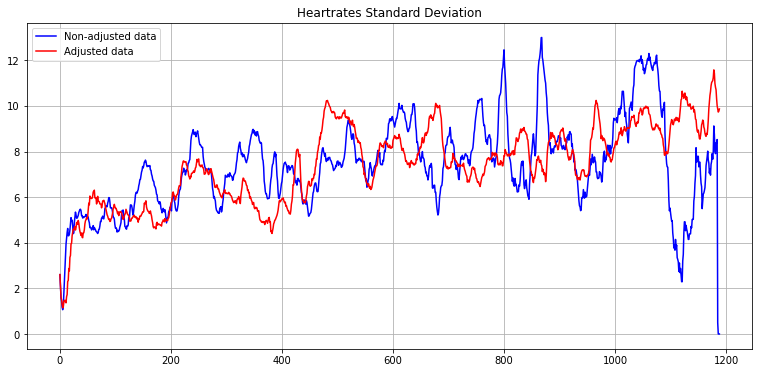

In [250]:
#Standard deviation plot

dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']

for i in range(len(games)):
        dic['x'+str(i)+'b']=np.array(dataset[games[i]]['b']['HR'])
        dic['x'+str(i)+'w']=np.array(dataset[games[i]]['w']['HR'])
        
heartrate = pd.DataFrame(dic)
time = dataset.index

tim = ds.index
std_x=[i for i in range(max(tim))]
std_y = [np.std(heartrate_adj.loc[i]) for i in mean_x]

std_x_axis = [i for i in range(max(time))]
std_y_axis = [np.std(heartrate.loc[i]) for i in std_x_axis]
plt.grid()
plt.plot(std_x_axis, std_y_axis, 'b')
plt.plot(std_x, std_y, 'r')
plt.title('Heartrates Standard Deviation')
plt.legend(['Non-adjusted data', 'Adjusted data'])

We can notice that the standard deviation of the adjusted data is following a general and quite steady increasing behaviour in standard deviation, caused by the "strech" of the heartbeats in the adjusted dataset. While the raw data's standard deviation reaches higher values but with time, and with the decrease of considered games, the deviation from the mean decreases drastically.

Now we want to see if and how the heart beat is infuenced by winning or loosing, or better, we want to analyze the different behaviours in the heartbeats of winners and loosers.
The model for the ith heart beat function will then be:

$ hb_{il}(t) = \mu(t)+\alpha_l (t) + \epsilon_{il} (t)$ for the loosers, and

$ hb_{iw}(t) = \mu(t)+\alpha_l (t) + \epsilon_{iw} (t)$ for the winners.

Where $\mu(t)$ is the mean across all the heartbeats, $\alpha_l(t)$ is the effect function (in this case of the loosers), representing how much the mean of the loosers differentiates from the grand mean, and $\epsilon_{il} (t)$ is the residuals function. 

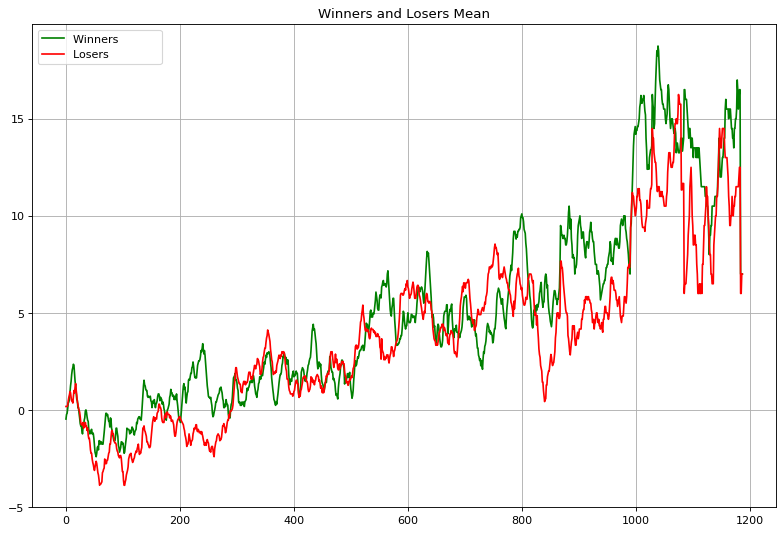

In [367]:
from scipy import interpolate
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import UnivariateSpline


figure(figsize=(12, 8), dpi=80)

realwage = pd.read_csv('prova.csv')
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

# Separating winners and losers heartbeats
winners = {'Game0814-2':'b', 'Game0816-6':'w', 'Game0816-1':'w', 'Game0816-7':'b', 'Game0813-3':'b', 'Game0813-4':'w', 'Game0529-2':'w', 'Game0529-5':'b', 'Game0813-2':'w', 'Game0529-4':'w', 'Game0529-3':'w', 'Game0814-1':'w', 'Game0816-2':'b', 'Game0816-5':'b', 'Game0816-4':'w', 'Game0816-3':'w', 'Game0529-1':'b', 'Game0813-1':'b'}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
dic_winners={}
dic_losers = {}
for el in games:
        if winners[el] == 'b':
                dic_winners[el+'b']=np.array(realwage[el]['b']['HR'])
                dic_losers[el+'w']=np.array(realwage[el]['w']['HR'])
        if winners[el] == 'w':
                dic_winners[el+'w']=np.array(realwage[el]['w']['HR'])
                dic_losers[el+'b']=np.array(realwage[el]['b']['HR'])
winn = pd.DataFrame(dic_winners)
lose = pd.DataFrame(dic_losers)


timew = winn.index
mean_x_axisw = [i for i in range(max(timew))]
mean_y_axisw = [(winn.loc[i]).mean() for i in mean_x_axisw]

timel = lose.index
mean_x_axisl = [i for i in range(max(timel))]
mean_y_axisl = [(lose.loc[i]).mean() for i in mean_x_axisl]
plt.grid()
plt.plot(mean_x_axisw, mean_y_axisw, 'green')
plt.plot(mean_x_axisl,mean_y_axisl,'red')
plt.title('Winners and Losers Mean')
plt.legend(['Winners           ', 'Losers           '])
#plt.plot(mean_x_axis, mean_y_axis, 'b')

spl = UnivariateSpline(mean_x_axisw, mean_y_axisw)

sple = UnivariateSpline(mean_x_axisl, mean_y_axisl)
sple.set_smoothing_factor(10)
spl.set_smoothing_factor(5)
# questo lo lascio?
#plt.plot(mean_x_axisl, sple(mean_x_axisl))
#plt.plot(mean_x_axisw, spl(mean_x_axisw))


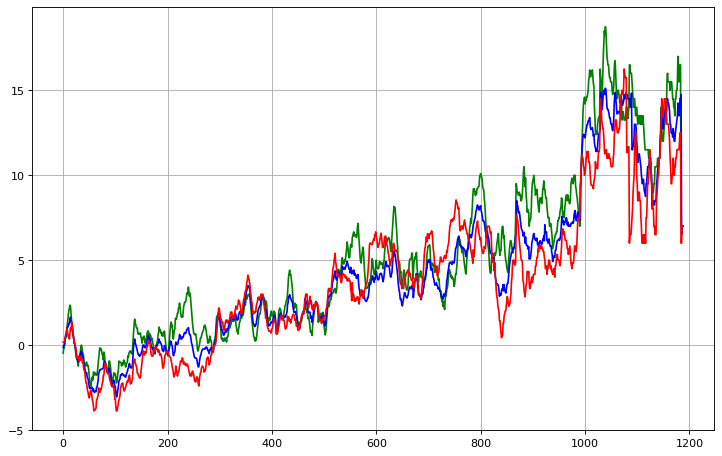

In [369]:
# Linear models plot

from matplotlib.pyplot import figure

figure(figsize=(11, 7), dpi=80)
diffw_y = [(-mean_y_axis[i] +mean_y_axisw[i]) for i in range(len(mean_x_axisw))]
diffl_y = [(-mean_y_axis[i] + mean_y_axisl[i]) for i in range(len(mean_x_axisl))]

mod = [mean_y_axis[i] +diffw_y[i] for i in range(len(mean_x_axisw))]
mod2 = [mean_y_axis[i] +diffl_y[i] for i in range(len(mean_x_axisl))]
#plt.plot(mean_x_axisw, diffw_y, 'green')
#plt.plot(mean_x_axisw, diffl_y, 'red')
plt.plot(mean_x_axisw, mod, 'g')
plt.plot(mean_x_axis, mean_y_axis, 'b')
plt.plot(mean_x_axisl, mod2, 'r')

plt.grid()
plt.show()


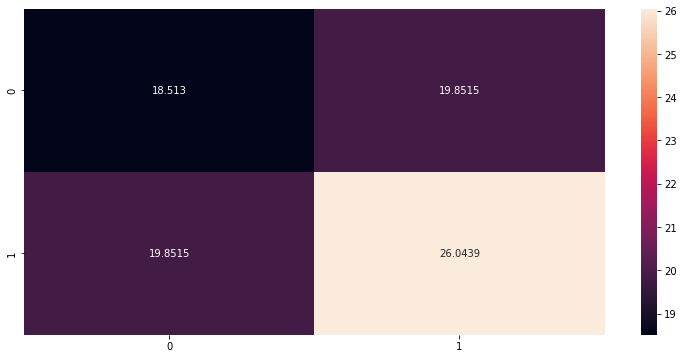

array([[18.51295123, 19.85145398],
       [19.85145398, 26.04394773]])

In [273]:
# covariance matrix between losers mean and winners mean
import seaborn as sn
cov = np.cov(mod, mod2)
sn.heatmap(cov, annot=True, fmt='g')
plt.show()
cov

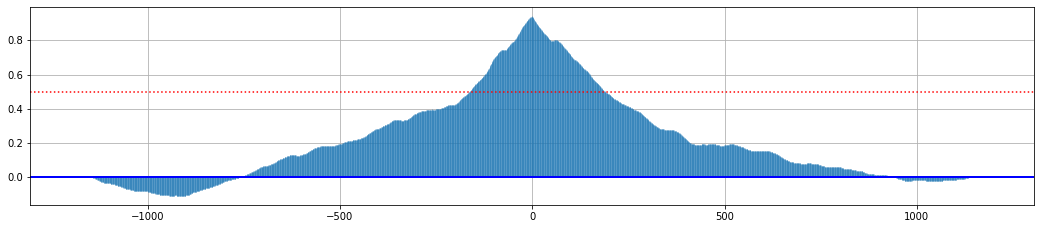

In [318]:
import scipy
import matplotlib.pyplot as plt

# Plot graph
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig.set_size_inches(18,8)

# cross correlation using xcorr() function
ax1.xcorr(mod, mod2, usevlines=True,
          maxlags=1187, normed=True,
          lw=0.5 )
# adding grid to the graph
ax1.grid(True)
ax1.axhline(0, color='blue', lw=2)
plt.axhline(0.5, linestyle='dotted', color='red')
# show final plotted graph
plt.show()



By looking at the covariance matrix and at the cross-correlation graph, we can say that at the beginning of the games there's a strong positive correlation between winners and losers, this result is probably given by the fact that at the start of each game, the two players are not distinguishable yet in loser and winner, so their heartbeats are quite similar, and they follow the same trend. After around 4 minutes, we suppose that the roles of winner and loser will start to be aknowledged by the players, and the correlation between the heartbeats will decrease. After approximately 15 minutes from the beginning of the game, the correlation will become slightly negative, and we suppose that this inversion of trend is due to the different moods of the players.

(potresti aggiungere le derivate eventualmente - ma a che scopo?)

### Functional Principal Component Analysis (FPCA)
We had a nice overlook at our data, we found some interesting information but we still haven't expoited a tool that is very useful when it comes to FDA, and this tool is FPCA. Functional principal component analysis (FPCA) is a statistical method for exploring the data and discovering characteristic behaviours of functional data. This method consists in representing a random function in the eigenbasis, which is an orthonormal basis of the Hilbert space L2. FPCA might be one of the best methods for extrapolating data features, and it was between the first methods that were considered in the early literature of functional data analysis. The main advantage is that the eigenfunction basis explains more variation than any other basis expansion, when using a fixed number of basis functions.

For this part of the analysis we will perform FPCA in different ways, first discretized FPCA and then we will convert the data with different basis, our hypothesis is that the BSpline basis will be the basis that works better with our data, and through the visualization of different plots, we'll find out if it's true that we can distinguish winners' heartbeats from losers' heartbeats through FPCA.

The first approach is discretized FPCA, that consists in looking only at the raw data, without any basis transformation. We impose 2 components and we fit them.

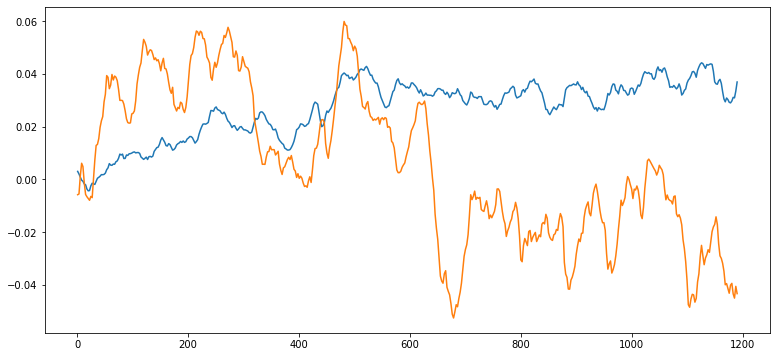

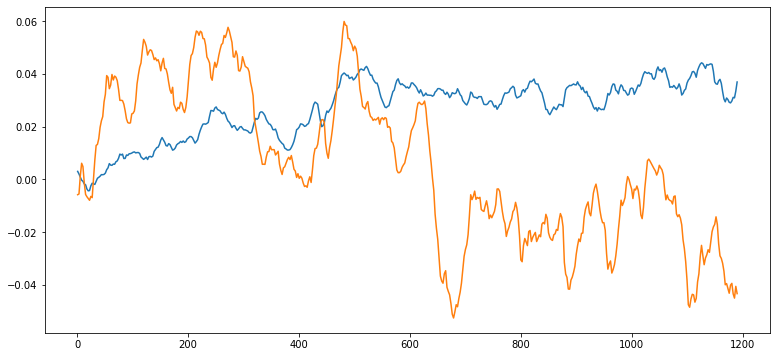

In [374]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.projection import FPCA


heartrate = pd.read_csv('heartrate.csv')
hr = []
for column in heartrate:
    lista = list(heartrate[column])
    hr.append(lista)


# time = (heartrate.index).to_numpy()
#heartrate = heartrate.to_numpy()
heartrate = skfda.FDataGrid(data_matrix=hr, sample_points=[*range(1, len(hr[0])+1)])
fpca_disc = FPCA(n_components=2)
fpca_disc.fit(heartrate)
fpca_disc.components_.plot()


As we can see, there isn't a clear distinction between the two functions, so we proceed with further analysis. We apply FPCA to data that was first converted using a basis representation. The first basis that we use is the BSpline, with seven basis functions.

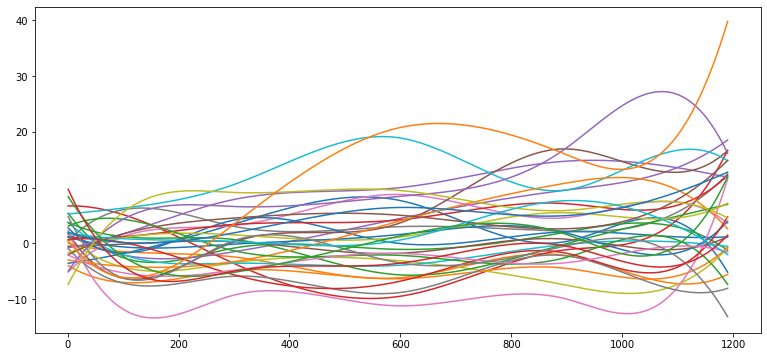

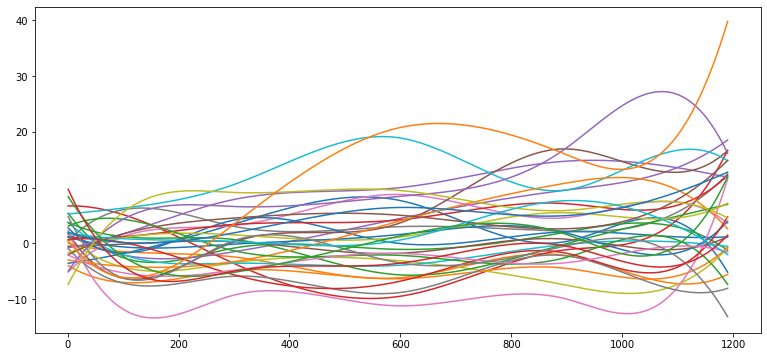

In [375]:
basis = skfda.representation.basis.BSpline(n_basis=7)
basis_hr = heartrate.to_basis(basis)
basis_hr.plot()

Now that we built a Basis object, we fit the new two principal components using the basis.

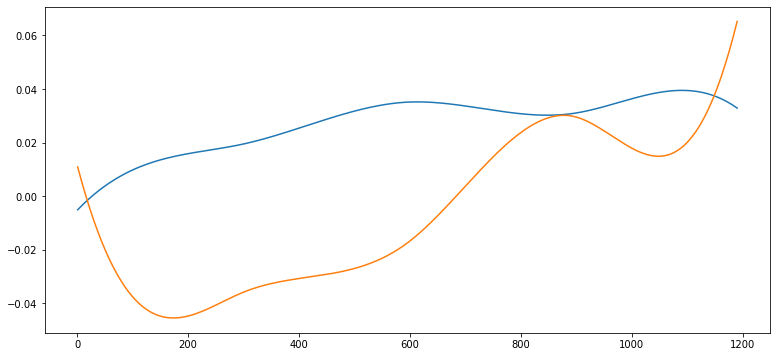

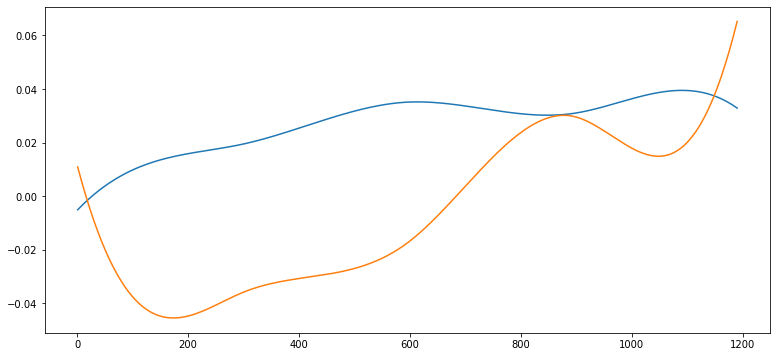

In [388]:
fpca = FPCA(n_components=2)
fpca.fit(basis_hr)
fpca.components_.plot()

To have a better look at the effects of the obtained two principal components, we add (Principal component 1) and subtract (Principal component 2) a multiple of the components, in our case 40, to the mean function through the FPCAPlot function. With this graphs we can hypothesize that the first one represents the difference in heartbeat increase between winners and losers, at first the changes of the heart rate's delta is the same, but towards the end the winners have a bigger increase; while for the second plot we could interpret it as the behaviour of the heartbeats, since we saw that the winners usually have a heartbeat decrease at the beginning of the game and a strong increase of heartbeat towards the end.

Inserisci grafico winner-loser adjusted

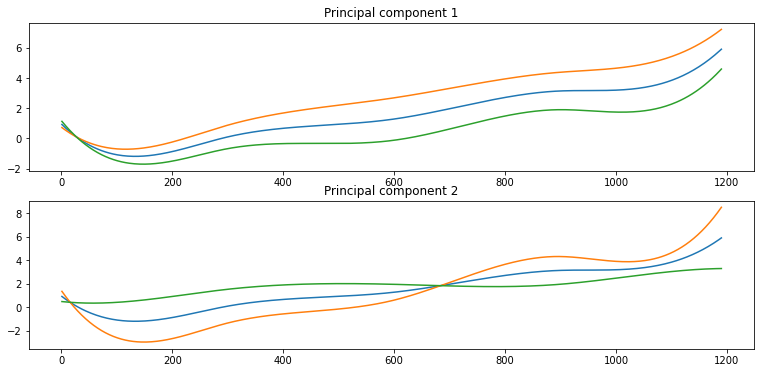

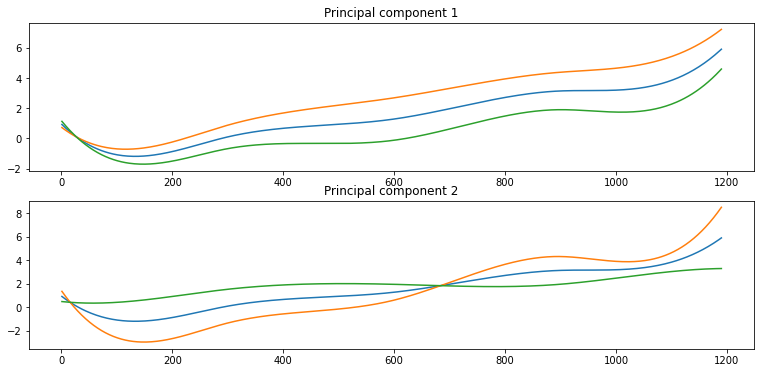

In [394]:
FPCAPlot(
    basis_hr.mean(),
    fpca.components_,
    multiple=40,
    n_rows=2,
    
).plot()

If we would have used a Fourier basis instead, the behaviour of the components would have been sinusoidal, and it wouldn't have been correspondent to the actual behaviour of the data.

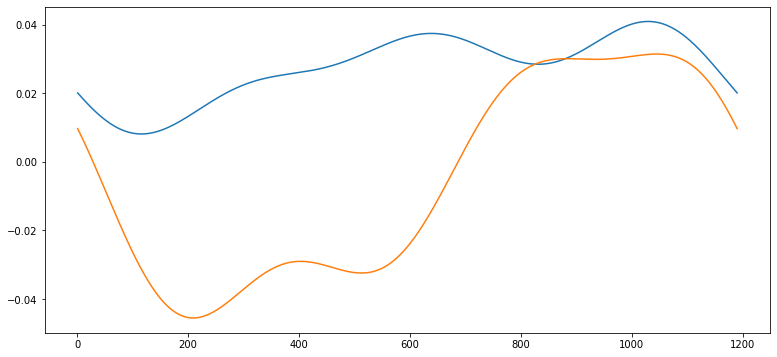

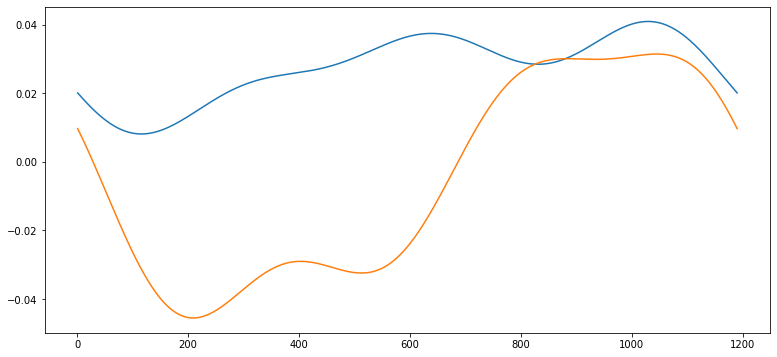

In [396]:
# Fourier basis
basis_hr = heartrate.to_basis(BSpline(n_basis=7))
fpca = FPCA(n_components=2, components_basis=Fourier(n_basis=7))
fpca.fit(basis_hr)
fpca.components_.plot()


### Neighbours functional regression

By using k-neighbours functional regression, we can predict a possible future outcome using past data, we will use the neighboring points to the new point of interest to predict what its _something_ might be. 

In [411]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import matplotlib.pyplot as plt
import numpy as np
import skfda
from skfda.ml.regression import KNeighborsRegressor
from skfda.preprocessing.dim_reduction.projection import FPCA


heartrate = pd.read_csv('heartrate.csv')
hr = []
for column in heartrate.loc[:, ::2]:
    lista = list(heartrate[column])
    hr.append(lista)
heartrate = skfda.FDataGrid(data_matrix=hr, sample_points=[*range(1, len(hr[0])+1)])

evaluation = pd.read_csv('evaluation.csv')
ev = []
for column in evaluation.loc[:, ::2]:
    listt = list(evaluation[column])
    ev.append(listt)
evaluation = skfda.FDataGrid(data_matrix=ev, sample_points=[*range(1, len(ev[0])+1)])



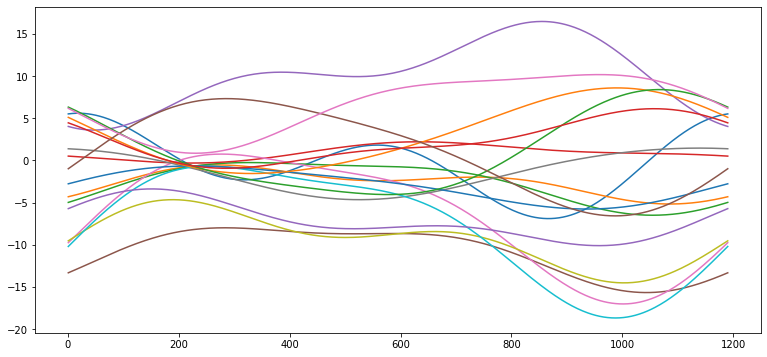

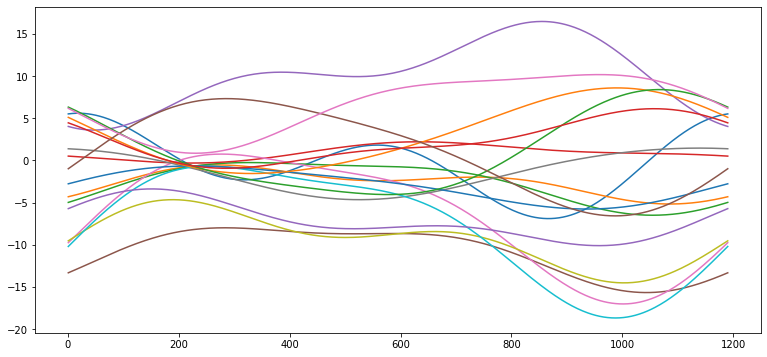

In [488]:
# Smoothing the evaluation function with 9 BSpline basis
basis = skfda.representation.basis.Fourier(n_basis=7)
evaluation = evaluation.to_basis(basis)
evaluation.plot()

In [489]:
# Now we split the dataset in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    heartrate,
    evaluation,
    test_size=0.2,
    random_state=28,
)

In [490]:
# We try now to make a prediction using 5 neighbors and the L2 distance. In this case, to calculate the response we will use a mean of the response, 
# weighted by their distance to the test sample.

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

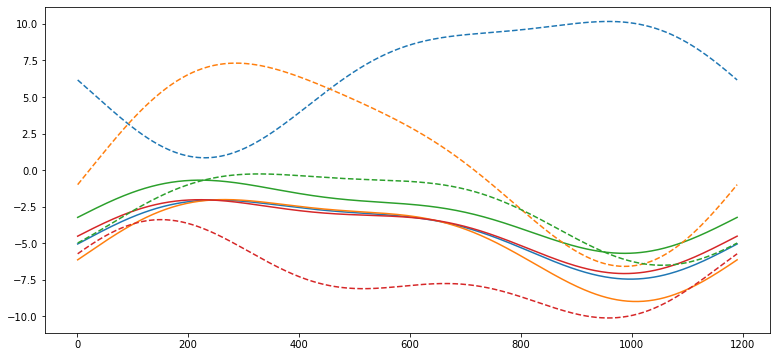

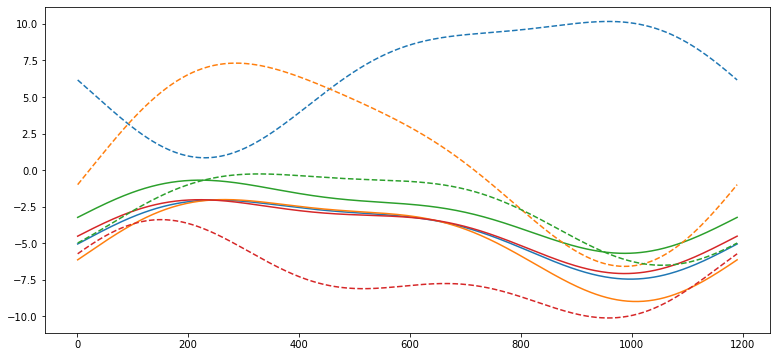

In [491]:
# Let's look at the predict values 

y_pred = knn.predict(X_test)

# Plot prediction
fig = y_pred.plot()
fig.axes[0].set_prop_cycle(None)  # Reset colors
y_test.plot(fig=fig, linestyle='--')

### ANOVA
(last one)

The example is going to be divided in three different groups. Then we are going to apply the ANOVA procedure to this groups to test if the means of this three groups are equal or not.
Functionality to perform One-way ANOVA analysis, to compare means among different samples. One-way stands for one functional response variable and one unique variable of input.
Perform one-way functional ANOVA.

This function implements an asymptotic method to test the following null hypothesis:

Let $ {X_i}_{i=1}^k $ be a set of $ k $ independent samples each one with $ n_i $ trajectories, and let $ E(X_i) = m_i(t) $.
The null hypothesis is defined as:
$$ H_0 = m_1(t)= ...= m_k (t) $$
This function calculates the value of the statistic v_sample_stat() $ V_n $ with the means of the given samples. Under the null hypothesis this statistic is asymptotically equivalent to v_asymptotic_stat(), where each sample is replaced by a gaussian process, with mean zero and the same covariance function as the original.

The simulation of the distribution of the asymptotic statistic $ V $ is implemented using a bootstrap procedure. One observation of the $ k $ different gaussian processes defined above is simulated, and the value of v_asymptotic_stat() is calculated. This procedure is repeated n_reps times, creating a sampling distribution of the statistic.

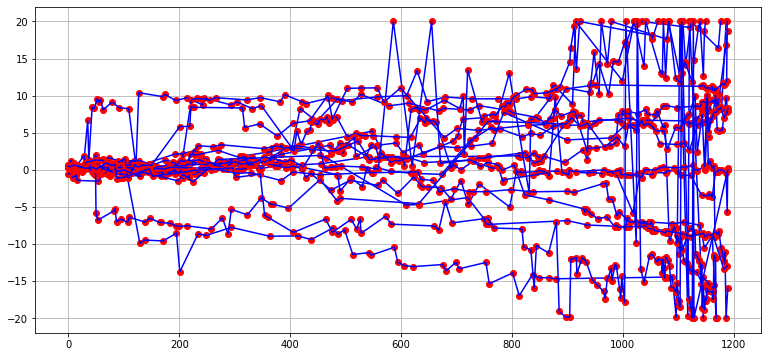

In [254]:
# prove di visualizzazione di adjust
ds = pd.DataFrame()
for i in range(len(games)):
    newcol = adjust(np.array(dataset[games[i]]['w']['Evaluation']), len(dataset))
    ds[i] = newcol


for y in range(len(ds.columns)):
    eval = [ds[y][0]]
    te = [0]
    for x in range(1, len(ds[y])):
        c  = 0
        if ds[y][x] != ds[y][x-1]:
            eval.append(ds[y][x])
            te.append(x)
    plt.plot(te, eval, 'ro', label="evaluation p.")
    plt.plot(te, eval, 'b', label="linear interpolation")


plt.grid()
#ds.to_csv(path_or_buf='vediamo.csv')

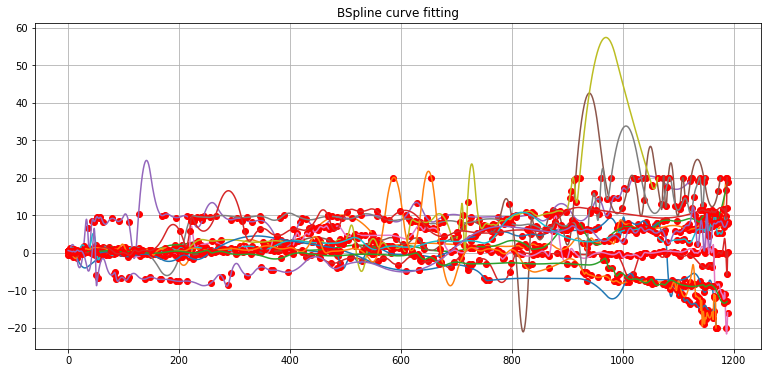

In [233]:
# mi sa che non lo metto
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy.interpolate import make_interp_spline
import math




#B-spline continuing
for y in range(len(ds.columns)):
    if y not in [4, 16]:
        eval = [ds[y][0]]
        te = [0]
        for x in range(1, len(ds[y])):
            if ds[y][x] != ds[y][x-1]:
                eval.append(ds[y][x])
                te.append(x)
        plt.plot(te, eval, 'ro', label="evaluation p.")
        #plt.plot(te, eval, 'b', label="linear interpolation")
        tck = interpolate.splrep(te, eval, s=0.006, k=2) 
        x_new = np.linspace(min(te), max(te), 10000)
        y_fit = interpolate.BSpline(*tck)(x_new)

        plt.title("BSpline curve fitting")
        #plt.plot(te, eval, 'ro', label="original")
        plt.plot(x_new, y_fit, label="B-spline")
    #plt.legend(loc='best', fancybox=True, shadow=True)

plt.grid()
plt.show() 


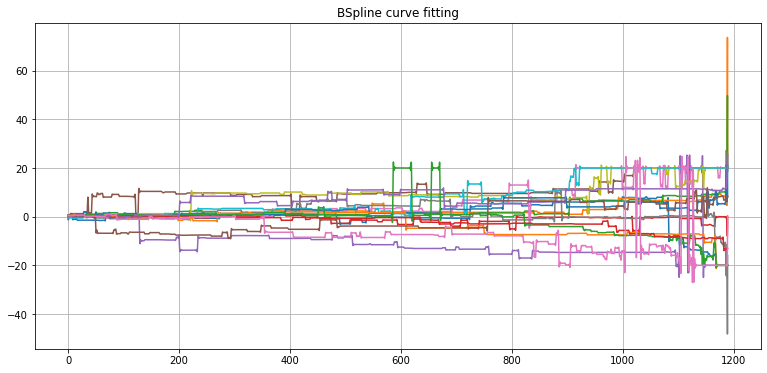

In [170]:
#manco questo
# Prining out the adjusted evaluations. In this graph we show the symmetric evaluations between black and white players.
dataset.dropna(axis=1)
te = [x for x in range (1190)]
dicw = {}
dicb = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
for i in range(len(games)):
        dicb['x'+str(i)+'b']=adjust(np.array(dataset[games[i]]['b']['Evaluation']), len(dataset))
        dicw['x'+str(i)+'w']=adjust(np.array(dataset[games[i]]['w']['Evaluation']),len(dataset))
evaluationw = pd.DataFrame(dicw)
evaluationb = pd.DataFrame(dicb)
time = dataset.index

plt.title('Adjusted Position Evaluation')
plt.grid()

for column in evaluationw:
    tck = interpolate.splrep(te, evaluationw[column], s=0.8, k=5) 
    x_new = np.linspace(min(te), max(te), 10000)
    y_fit = interpolate.BSpline(*tck)(x_new)

    plt.title("BSpline curve fitting")
    #plt.plot(te, eval, 'ro', label="original")
    plt.plot(x_new, y_fit, label="B-spline")


plt.show()



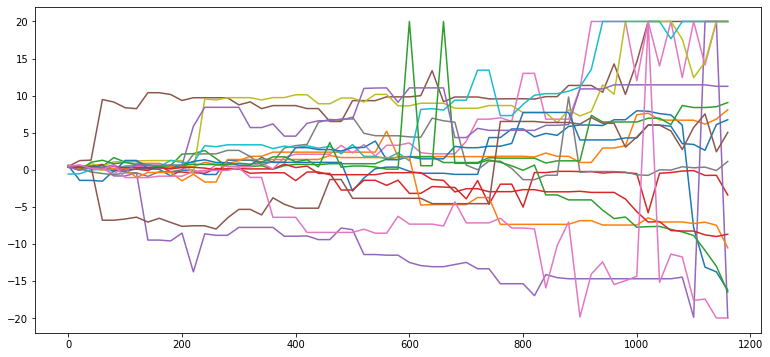

In [177]:
# nuova prova con un evaluation ogni 10 secondi
tempo = [x for x in range(0,1190, 20)]
tempo.pop(-1)
len(tempo)
listona = []
for column in evaluationw:
    listona.append([])
    for x in range(59):
        listona[-1].append(evaluationw[column][x*20])
for el in listona:
    plt.plot(tempo, el)


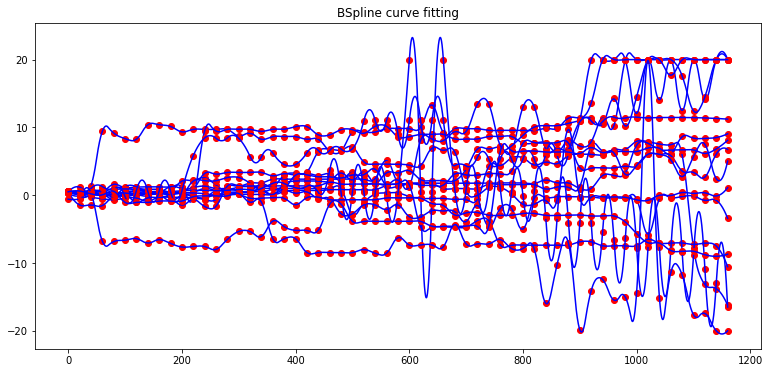

In [235]:
for x in range(len(listona)):
    if x != 4:
        tck = interpolate.splrep(tempo, listona[x], s=0.05, k=2) 
        x_new = np.linspace(min(tempo), max(tempo), 10000)
        y_fit = interpolate.BSpline(*tck)(x_new)

        plt.title("BSpline curve fitting")
        plt.plot(tempo, listona[x], 'ro', label="original")
        plt.plot(x_new, y_fit, 'b', label="B-spline")


plt.show()